In [8]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [9]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
numerical = data._get_numeric_data()


In [11]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
X = numerical.drop(['Total Claim Amount'],axis = 1)
Y = numerical['Total Claim Amount']

In [13]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [14]:
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=100)

In [16]:
len(X)

9134

In [17]:
len(X_test)

3654

In [18]:
model = sm.OLS(Y_train,X_train).fit()

In [19]:
predictions = model.predict(X_test)

In [20]:
r2_score(Y_test,predictions)

0.48288009054567327

In [23]:
numerical['Income'] = numerical['Income'].replace(0,numerical['Income'].mean())

In [24]:
arr, lmbda = stats.boxcox(numerical['Income'])
arr

array([42.11498267, 38.34627666, 40.73536758, ..., 38.34627666,
       33.75131941, 38.34627666])

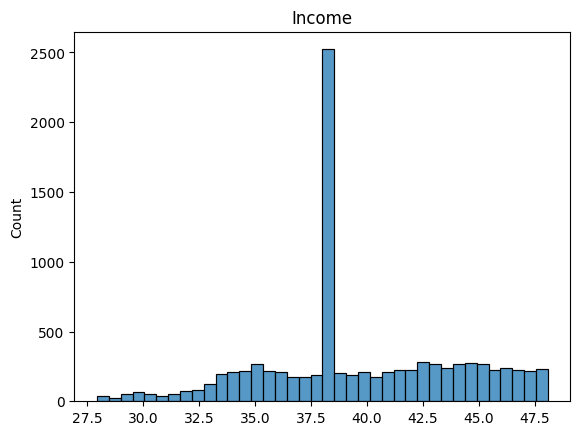

In [25]:
sns.histplot(arr)
plt.title('Income')
plt.show()

In [44]:
arr2, lmbda = stats.boxcox(numerical['Customer Lifetime Value'])
arr2

array([2.70383943, 2.75492635, 2.78077243, ..., 2.76206241, 2.75839723,
       2.70016535])

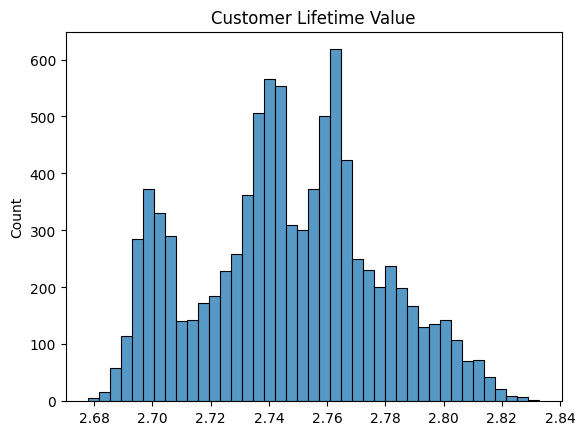

In [53]:
sns.histplot(arr2)
plt.title('Customer Lifetime Value')
plt.show()

In [49]:
numerical['Monthly Premium Auto'] = numerical['Monthly Premium Auto'].replace(0,numerical['Monthly Premium Auto'].mean())

In [50]:
arr3, lmbda = stats.boxcox(numerical['Monthly Premium Auto'])
arr3

array([0.68534739, 0.6858706 , 0.68603902, ..., 0.68572538, 0.68589838,
       0.68556047])

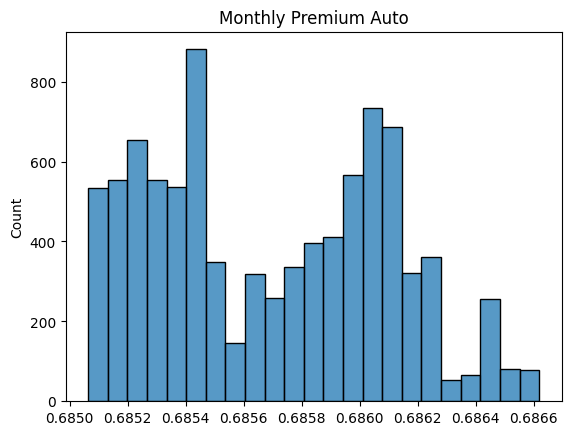

In [64]:
sns.histplot(arr3)
plt.title('Monthly Premium Auto')
plt.show()

In [67]:
numerical['Months Since Last Claim'] = numerical['Months Since Last Claim'].replace(0,numerical['Months Since Last Claim'].mean())

In [68]:
arr4, lmbda = stats.boxcox(numerical['Months Since Last Claim'])
arr4

array([10.8091316 ,  5.78326935,  7.31142719, ...,  4.36374168,
       11.2484994 ,  1.52398721])

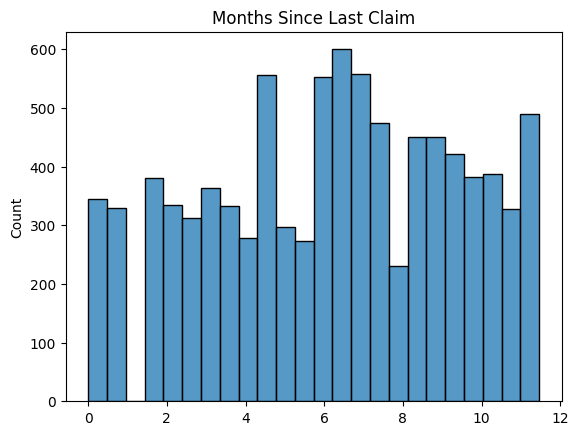

In [69]:
sns.histplot(arr4)
plt.title('Months Since Last Claim')
plt.show()

In [71]:
numerical['Months Since Policy Inception'] = numerical['Months Since Policy Inception'].replace(0,numerical['Months Since Policy Inception'].mean())

In [72]:
arr5, lmbda = stats.boxcox(numerical['Months Since Policy Inception'])
arr5

array([ 3.01730086, 18.77038676, 17.38022491, ..., 17.02624808,
        1.66766072, 33.34384569])

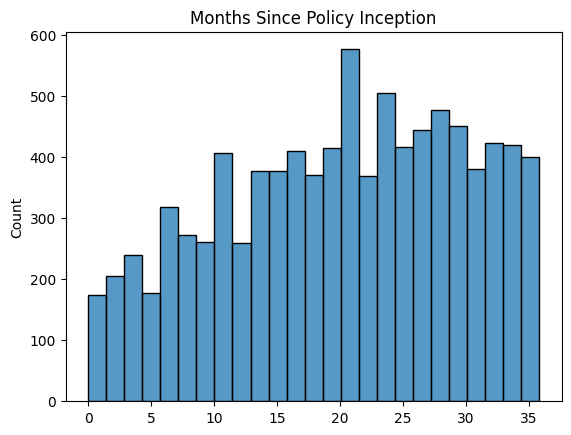

In [73]:
sns.histplot(arr5)
plt.title('Months Since Policy Inception')
plt.show()

In [26]:
numerical['Number of Open Complaints'] = numerical['Number of Open Complaints'].replace(0,numerical['Number of Open Complaints'].mean())

In [28]:
arr6, lmbda = stats.boxcox(numerical['Number of Open Complaints'])
arr6

array([-5.94137646, -5.94137646, -5.94137646, ...,  0.31156291,
       -5.94137646, -5.94137646])

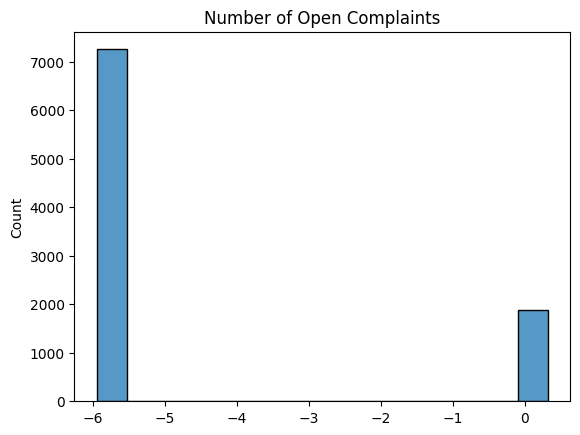

In [29]:
sns.histplot(arr6)
plt.title('Number of Open Complaints')
plt.show()

In [79]:
numerical['Number of Policies'] = numerical['Number of Policies'].replace(0,numerical['Number of Policies'].mean())

In [80]:
arr7, lmbda = stats.boxcox(numerical['Number of Policies'])
arr7

array([0.        , 1.42435941, 0.60732846, ..., 0.60732846, 0.89348634,
       0.        ])

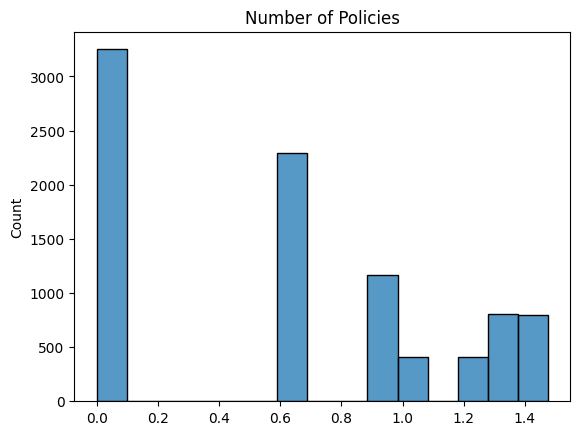

In [81]:
sns.histplot(arr7)
plt.title('Number of Policies')
plt.show()